In [1]:
# takes 30h for 6m->3m hand records, 10h per 1m, 1h per 100k.
# Read acbl_hand_records.pkl file and clean up double dummy (DD) and par errors.
# Best to re-use previous cleaned up results as performance is slow. Use previous results unless record is new.
# It's not sufficient to validate par score vul calcs by simply correcting vul because some scores would be missing.
# Creates ../acbl/acbl_hand_records_cleaned.pkl

# todo:
# acbl_hand_records.pkl are incorrect due to legacy ignoring of vul. Clean here or correct sql in previous step? 
# figure out why this line throws an exception: stdhrs.at[grp_start+handno,'Par'] = pars
# board_record_string has replaced '10' with 'T'. This is confusing as it doesn't match sql. Needed?

# next steps:
# merge-hand-records.ipynb merges acbl and tcg standardized hand records?

# previous steps:
# acbl_sql_to_hand_records.ipynb creates acbl_hand_records.pkl

# Requirements
# https://github.com/Afwas/python-dds with some of my mods.
# If pickle errors: pip install --upgrade pandas

In [2]:
import pandas as pd
import pathlib
import mlBridgeLib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [5]:
# takes 1m
acbl_hand_records_augmented_df = acblPath.joinpath('acbl_hand_records_dd_experiments.pkl') # tip: overwrite file with ..._dd_experiments.pkl for restart
stdhrs = pd.read_pickle(acbl_hand_records_augmented_df)
display(len(stdhrs),stdhrs)

2962269

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,QT,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])","(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,"(6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))",...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])","(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,"(6.5, ((1.0, (0, 0.5, 0, 0.5)), (2, (1, 0, 0, 1)), (2.0, (0.5, 0, 1.5, 0)), (1.5, (0, 1, 0.5, 0))))",...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2

In [6]:
# takes 15s
df = stdhrs[stdhrs['Par_nwse'].notna()].copy()
df

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,QT,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])","(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,"(6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))",...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])","(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,"(6.5, ((1.0, (0, 0.5, 0, 0.5)), (2, (1, 0, 0, 1)), (2.0, (0.5, 0, 1.5, 0)), (1.5, (0, 1, 0.5, 0))))",...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2

In [7]:
# takes 7s
#stdhrs.drop(['DDmakes_nwse','Par_nwse'],axis='columns',inplace=True)
if 'Par_var' not in df:
    df.insert(df.columns.get_loc('Par')+1,'Par_var',None)
par_var_col_loc = df.columns.get_loc('Par_var')
df

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])",None,"(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])",None,"(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ

In [8]:
# takes 50s
df['Par_var'] = df.apply(lambda r: r['Par'][0]-r['Par_nwse'][0],axis='columns')
df['Par_var'].value_counts()

 0       1201421
 30       146532
-30       142270
 10        62216
-10        61261
-20        60132
 20        56839
-280       49332
 280       48266
-200       40174
 200       38543
-480       35740
 480       34611
 40        30788
-40        28117
 530       26561
-530       26143
 780       20148
 300       20140
-780       18976
-520       18657
 520       17936
-300       17906
 240       17888
-240       17572
          ...   
 2000          2
 2200          2
 1450          2
-2090          2
-2100          1
-1840          1
-1750          1
 1860          1
-1030          1
 1810          1
 1800          1
-2360          1
-1880          1
 2070          1
-1870          1
 2410          1
 1630          1
-1820          1
-2020          1
-1700          1
-2000          1
 1820          1
 1900          1
-1610          1
-1940          1
Name: Par_var, Length: 361, dtype: int64

<AxesSubplot:>

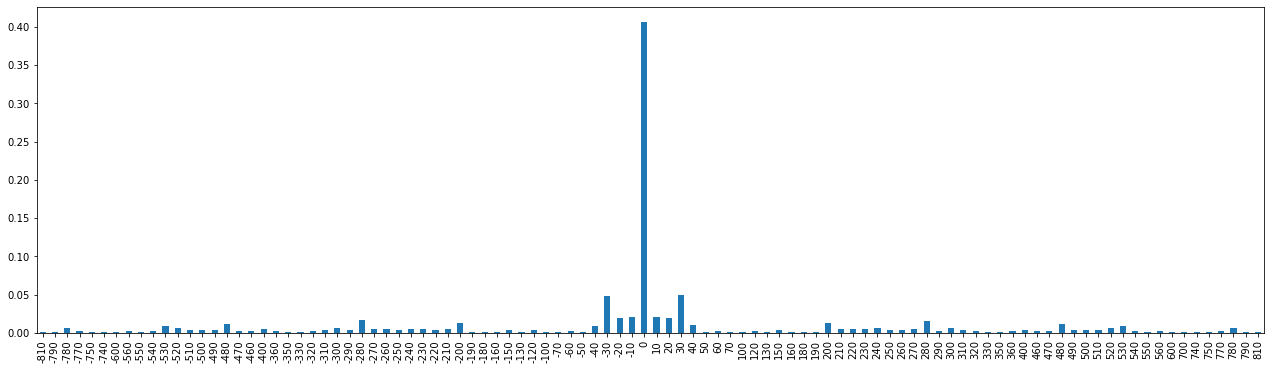

In [9]:
df['Par_var'].value_counts(normalize=True).nlargest(100).sort_index().plot(kind='bar',figsize=(22,6))

In [10]:
# takes 40s
# Create columns of double dummy by direction by suit. e.g. DD_N_C.
def Augment_DDmakes(ddmakes, prefix):
    ddmakesd = defaultdict(list)
    for dd in ddmakes:
        for direction,nesw in zip(mlBridgeLib.NESW,dd):
            for suit,cdhsn in zip(mlBridgeLib.CDHSN,nesw):
                assert cdhsn is not None
                ddmakesd['_'.join([prefix,direction,suit])].append(cdhsn)
    return ddmakesd

ddmakesd = Augment_DDmakes(df['DDmakes_nwse'],'DD_nwse')
ddmakesdf = pd.DataFrame(ddmakesd,dtype='int8')
display(ddmakesdf.dtypes,ddmakesdf.head())
assert len(df) == len(ddmakesdf)
df = pd.concat([df,ddmakesdf],axis='columns') # todo: why is join needed? -- ,join='inner')
del ddmakesdf,ddmakesd
display(df.dtypes,df)

DD_nwse_N_C    int8
DD_nwse_N_D    int8
DD_nwse_N_H    int8
DD_nwse_N_S    int8
DD_nwse_N_N    int8
DD_nwse_E_C    int8
DD_nwse_E_D    int8
DD_nwse_E_H    int8
DD_nwse_E_S    int8
DD_nwse_E_N    int8
DD_nwse_S_C    int8
DD_nwse_S_D    int8
DD_nwse_S_H    int8
DD_nwse_S_S    int8
DD_nwse_S_N    int8
DD_nwse_W_C    int8
DD_nwse_W_D    int8
DD_nwse_W_H    int8
DD_nwse_W_S    int8
DD_nwse_W_N    int8
dtype: object

,DD_nwse_N_C,DD_nwse_N_D,DD_nwse_N_H,DD_nwse_N_S,DD_nwse_N_N,DD_nwse_E_C,DD_nwse_E_D,DD_nwse_E_H,DD_nwse_E_S,DD_nwse_E_N,DD_nwse_S_C,DD_nwse_S_D,DD_nwse_S_H,DD_nwse_S_S,DD_nwse_S_N,DD_nwse_W_C,DD_nwse_W_D,DD_nwse_W_H,DD_nwse_W_S,DD_nwse_W_N
0,9,3,9,3,8,2,10,3,10,2,10,3,9,3,8,2,10,3,10,2
1,8,8,7,7,7,4,5,6,6,5,8,8,7,7,7,4,5,6,6,5
2,8,6,10,4,6,5,7,2,9,4,8,6,10,4,6,5,7,2,9,4
3,2,1,10,8,1,11,11,3,5,11,2,1,10,8,1,11,11,3,5,11
4,7,3,6,2,4,6,10,6,11,8,7,3,6,2,4,6,10,6,11,8


ref                    object
hand_record_id         object
event_id                int64
Board                  string
EventBoard             string
Dealer                 object
Vul                    object
board_record_string    object
Hands                  object
Par                    object
Par_var                 int64
Par_nwse               object
DDmakes                object
DDmakes_nwse           object
DD_N_C                   int8
DD_N_D                   int8
DD_N_H                   int8
DD_N_S                   int8
DD_N_N                   int8
DD_E_C                   int8
DD_E_D                   int8
DD_E_H                   int8
DD_E_S                   int8
DD_E_N                   int8
DD_S_C                   int8
                        ...  
CT_EW_N_Game             bool
CT_EW_N_SSlam            bool
CT_EW_N_GSlam            bool
Vul_NS                   bool
Vul_EW                   bool
DD_nwse_N_C              int8
DD_nwse_N_D              int8
DD_nwse_N_

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW,DD_nwse_N_C,DD_nwse_N_D,DD_nwse_N_H,DD_nwse_N_S,DD_nwse_N_N,DD_nwse_E_C,DD_nwse_E_D,DD_nwse_E_H,DD_nwse_E_S,DD_nwse_E_N,DD_nwse_S_C,DD_nwse_S_D,DD_nwse_S_H,DD_nwse_S_S,DD_nwse_S_N,DD_nwse_W_C,DD_nwse_W_D,DD_nwse_W_H,DD_nwse_W_S,DD_nwse_W_N
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])",300,"(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,...,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,9,3,9,3,8,2,10,3,10,2,10,3,9,3,8,2,10,3,10,2
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])",0,"(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,...,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,8,8,7,7,7,4,5,6,6,5,8,8,7,7,7,4,5,6,6,5
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ, 42), (QJ763, KJT, 65, AKT))","(140, [(3, H, , NS, 0)])",-60,"(200, [(4, S, *, EW, -1)])","((9, 7, 9, 4, 6), (4, 6, 3, 8, 6), (9, 7, 9, 5, 6), (4, 6

In [11]:
# takes 3s
for d in mlBridgeLib.CDHSN:
    df['DD_N_'+d+'_var'] = df['DD_N_'+d]-df['DD_nwse_N_'+d]
    df['DD_N_'+d+'_avg'] = df[['DD_N_'+d,'DD_nwse_N_'+d]].mean(axis=1)
df['DD_N_N_var'].value_counts(), df['DD_N_N_avg'].value_counts()

( 0     1365819
  1      504369
 -1      498987
  2      185148
 -2      181313
 -3       69711
  3       68010
 -4       31846
  4       30289
 -5       10407
  5        9671
  6        3009
 -6        2183
 -7         616
  7         554
 -8          99
  8          95
  10         60
 -9          35
  9          27
 -10         13
 -11          5
  11          3
 Name: DD_N_N_var, dtype: int64,
 6.00     261920
 7.00     244595
 5.00     235307
 8.00     203659
 4.00     190333
 5.50     166402
 6.50     161802
 4.50     147606
 3.00     146477
 7.50     142131
 9.00     133228
 3.50     116709
 8.50     110135
 2.00     105490
 10.00     88497
 2.50      84506
 9.50      78979
 1.00      65241
 11.00     54126
 1.50      49541
 10.50     49473
 12.00     32705
 0.00      27692
 11.50     26787
 0.50      20081
 13.00     10604
 12.50      8243
 Name: DD_N_N_avg, dtype: int64)

<AxesSubplot:>

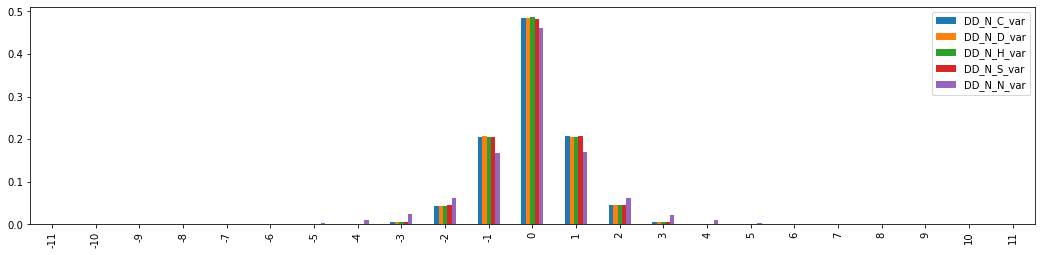

In [12]:
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_var'
    plotd[n] = df[n].value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4))

<AxesSubplot:>

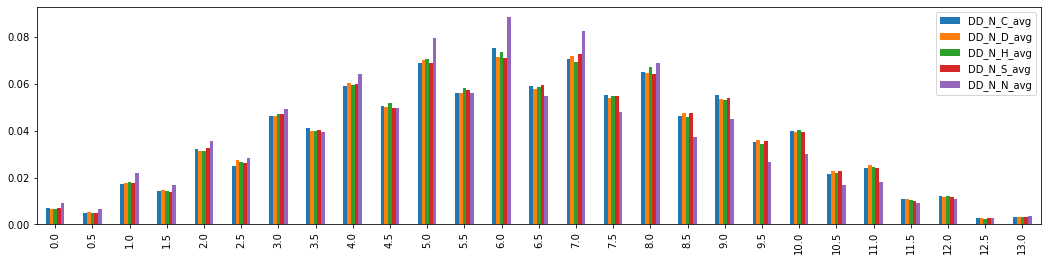

In [13]:
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg'
    plotd[n] = df[n].value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4))

In [14]:
# takes 2s
# todo: use different variable name than df
augmented_df = df.copy()

In [15]:
augmented_df.columns

Index(['ref', 'hand_record_id', 'event_id', 'Board', 'EventBoard', 'Dealer',
       'Vul', 'board_record_string', 'Hands', 'Par',
       ...
       'DD_N_C_var', 'DD_N_C_avg', 'DD_N_D_var', 'DD_N_D_avg', 'DD_N_H_var',
       'DD_N_H_avg', 'DD_N_S_var', 'DD_N_S_avg', 'DD_N_N_var', 'DD_N_N_avg'],
      dtype='object', length=231)

In [16]:
# take 5m
# convert Hands to OHE (One Hot Encoding)
tupled_handsl = augmented_df['Hands']
bin_handsl = mlBridgeLib.HandsLToBin(tupled_handsl)
print(len(bin_handsl),bin_handsl[:2])
ohe_handsl = mlBridgeLib.BinLToOHE(bin_handsl)
print(len(ohe_handsl),ohe_handsl[:2])
assert len(ohe_handsl[0]) == 52*4
retupled_handsl = mlBridgeLib.OHEToHandsL(ohe_handsl)
print(len(retupled_handsl),retupled_handsl[:2])
assert len(tupled_handsl) == len(retupled_handsl)
assert tupled_handsl[0] == retupled_handsl[0]
ohe_handsl[:2]

2962269 [('0b100010000010000000001100010000000011001011100100', '0b1000001001010001000000000001100100100100100000001001', '0b100000100000100111100010010000000010000000100010010', '0b11010000101000000011100000001011001000010000000000'), ('0b101001000010100000000000010000001100101001100010', '0b1001000010100000011100000000001001010001000000001001', '0b100010100000001000010100110100010000010010000010000', '0b10000000011100000001011001000100100000000110000100')]
2962269 [(0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

[(0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,


In [17]:
# takes 2m
# create dataframe of OHE hands
# todo: make restartable using new variable name
ohe_hands_df = pd.DataFrame(ohe_handsl,index=augmented_df.index,columns=[nesw+suit+denom for nesw in mlBridgeLib.NESW for suit in mlBridgeLib.SHDC for denom in mlBridgeLib.ranked_suit],dtype='int8')
augmented_df = pd.concat([augmented_df,ohe_hands_df],axis='columns')
augmented_df

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,SC9,SC8,SC7,SC6,SC5,SC4,SC3,SC2,WSA,WSK,WSQ,WSJ,WST,WS9,WS8,WS7,WS6,WS5,WS4,WS3,WS2,WHA,WHK,WHQ,WHJ,WHT,WH9,WH8,WH7,WH6,WH5,WH4,WH3,WH2,WDA,WDK,WDQ,WDJ,WDT,WD9,WD8,WD7,WD6,WD5,WD4,WD3,WD2,WCA,WCK,WCQ,WCJ,WCT,WC9,WC8,WC7,WC6,WC5,WC4,WC3,WC2
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])",300,"(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,...,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])",0,"(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ, 42), (QJ763, KJT, 65, AKT))","(140, [(3, H, , NS, 0)])",-60,"(200, [(4, S, *, EW, -1)])","((9, 7, 9, 4, 6), (4, 6, 3, 8, 6), (9, 7, 9, 5, 6), (4, 6, 3, 8, 6))","((8, 6, 10, 4, 6), (5, 7, 2, 9, 4), (8, 6, 10, 4, 6), (5, 7, 2, 9, 4))",9,7,9,4,6,4,6,3,8,6,9,7,9,5,6,4,6,3,8,6,"((0b100000000000000011010010100100000010011000011010, (0b100000000, 0b110100, 0b1010010000001, 0...",0b100000000000000011010010100100000010011000011010,0b100011000100000000000100000001011001100000011100000,0b1000000001001101001100001101010000000000000000000101,0b11000110010010110000000000000000110001100100000000,"((9, (0, 0, 6, 3)), (3, (3, 0, 0, 0)), (14, (4, 6, 4, 0)), (14, (3, 4, 0, 7)))",9,0,0,6,3,3,3,0,0,0,14,4,6,4,0,14,3,4,0,7,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,"(acbl, 2620420)",77908,100961,28,200217A_28,W,N_S,STHQJ9632DJ9CJ932SKQH8DQT86542CT76SJ76HATDAK3CAKQ84SA985432HK754D7C5,"((T, QJ9632, J9, J932), (J76, AT, AK3, AK

In [18]:
valid_start, valid_end = "210601","210615"
test_start, test_end = valid_end, "999999"
#valid_start, valid_end = "210601","210701"
#test_start, test_end = valid_end, "999999"

In [19]:
# takes 8s
augmented_df['Valid'] = augmented_df['EventBoard'].between(valid_start,valid_end,inclusive='left')
sum(augmented_df['Valid'])

45924

In [20]:
# takes 10s
augmented_df['Test'] = augmented_df['EventBoard'].between(test_start,test_end,inclusive='left')
test = augmented_df[augmented_df['Test']].copy()
augmented_df = augmented_df[~augmented_df['Test']].copy()
len(augmented_df),len(test),sum(test['Test'])

(2709153, 253116, 253116)

In [21]:
# takes 4m-14m
import fastai.tabular.all

# dependent variable column names
dep_vars = ['DD_N_C_avg', 'DD_N_D_avg', 'DD_N_H_avg', 'DD_N_S_avg', 'DD_N_N_avg']

# continuous valued column names
cont_names = ['Vul_NS', 'Vul_EW']
cont_names += ['SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C']
##cont_names += ['HCP_NS', 'HCP_EW']
cont_names += ['HCP_S', 'HCP_EW']
cont_names += [direction+suit+card for direction in ['N'] for suit in mlBridgeLib.SHDC for card in mlBridgeLib.ranked_suit if direction+suit+card in df]
##cont_names += ['HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C']
#cont_names += ['HCP_S_S', 'HCP_S_H', 'HCP_S_D', 'HCP_S_C']
#cont_names += ['HCP_E_S', 'HCP_E_H', 'HCP_E_D', 'HCP_E_C']
#cont_names += ['HCP_W_S', 'HCP_W_H', 'HCP_W_D', 'HCP_W_C']
##cont_names += ['QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C']
cont_names += dep_vars

# categorical valued column names. fastai wants ints.
# better?
#cat_names = list(df.select_dtypes(['category']).columns)
#df[cat_names] = df[cat_names].apply(lambda x: x.cat.codes)
cat_names = ['SL_Max_NS', 'SL_Max_EW']

#split = fastai.tabular.all.RandomSplitter(valid_pct=0.2)(fastai.tabular.all.range_of(df))
#test = pd.Series(augmented_df['EventBoard'].ge("210701"),name='Test',dtype='bool') # note: using augmented_df instead of df for split
#valid = pd.Series(augmented_df['EventBoard'].between("210601","210701"),name='Valid',dtype='bool') # note: using augmented_df instead of df for split
df = augmented_df[cont_names+cat_names].copy() # pd.concat([augmented_df[cont_names+cat_names],valid],axis='columns')
df.reset_index(drop=True,inplace=True)
display(df.head())

#cont_names += ohe_hands_df.columns.to_list()
for n in cat_names:
    df[n] = df[n].cat.codes
cont_names += cat_names
cat_names = []
print(cont_names, cat_names)

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in cont_names:
    if pd.api.types.is_bool_dtype(df[n]):
        df[n] = df[n].astype('uint8')

# special case catagoricals: catagoricals which are to be made into continuous
#df = df.astype({'Par_Score':'int16'})

assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names)
for n in df:
    assert n in cont_names+cat_names, n
    assert not pd.api.types.is_bool_dtype(df[n]), n # TabularDataLoaders.from_df has bug which disallows bool
    assert not pd.api.types.is_object_dtype(df[n]), n
for n in cont_names+cat_names+dep_vars:
    assert n in df

# create fastai dataloader
procs = [fastai.tabular.all.Normalize] # fastai.tabular.all.Categorify, fastai.tabular.all.FillMissing, 
y_names = dep_vars
# valid_idx specifies a list of indexes to validation rows.
#assert pd.api.types.is_bool_dtype(df['Valid'])
valid_idx = df[augmented_df['Valid'].values].index # using augmented_df
assert max(valid_idx) < len(df)
bs = 1024 # fastai results weird out at > 1024 (on 1660ti).
device = 'cuda' # 'cuda' or 'cpu'
# interaction problem between specifying all cont_names, cat_names and valid_idx.

dls = fastai.tabular.all.TabularDataLoaders.from_df(df, proc=procs, cont_names=cont_names, cat_names=cat_names,
    y_names=y_names, valid_idx=valid_idx, bs=bs, device=device, verbose=True) # max is len(df)-len(valid_idx)

# create fastai tabular_learner from dataloader
layers = [8192, 8192, 4096, 4096, 2048, 2048, 1024, 1024, 512, 512, 256, 256, 128, 128, 64, 64, 32, 32, 16, 16]
metrics = fastai.tabular.all.accuracy_multi if len(y_names) else fastai.tabular.all.accuracy
learn = fastai.tabular.all.tabular_learner(dls, layers=layers, metrics=metrics)

# fit data
learn.fit(1)

,Vul_NS,Vul_EW,SL_N_S,SL_N_H,SL_N_D,SL_N_C,HCP_S,HCP_EW,DD_N_C_avg,DD_N_D_avg,DD_N_H_avg,DD_N_S_avg,DD_N_N_avg,SL_Max_NS,SL_Max_EW
0,False,True,2,3,2,6,12,19,9.50,3.50,9.50,3.50,8.00,SL_NS_H,SL_EW_S
1,True,True,3,2,3,5,13,18,8.00,8.00,7.00,7.00,7.00,SL_NS_D,SL_EW_S
2,False,True,1,3,4,5,14,17,8.50,6.50,9.50,4.00,6.00,SL_NS_H,SL_EW_S
3,True,False,1,6,2,4,7,28,1.50,0.50,10.00,8.00,1.00,SL_NS_H,SL_EW_D
4,True,True,1,5,2,5,4,27,6.50,2.50,6.00,1.50,3.50,SL_NS_H,SL_EW_S


['Vul_NS', 'Vul_EW', 'SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C', 'HCP_S', 'HCP_EW', 'DD_N_C_avg', 'DD_N_D_avg', 'DD_N_H_avg', 'DD_N_S_avg', 'DD_N_N_avg', 'SL_Max_NS', 'SL_Max_EW'] []
Setting up after_item: Pipeline: 
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: ReadTabBatch


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.062145,0.051212,0.994312,11:55


In [22]:
def AppendPredictionsToDF(df, preds):
    valid_idx = df.index
    df_preds = pd.concat([df,pd.DataFrame(preds,index=valid_idx,columns=[n+'_pred' for n in y_names])],axis='columns')
    for n in y_names:
        df_preds.loc[valid_idx,n+'_var'] = df_preds[n]-df_preds[n+'_pred']
    # todo: use SL_Max_NS column as an index into 'DD_N_?', 'DD_N_?_pred', 'DD_N_?_var' to get max for each row
    for n in ['SL_Max_NS','SL_Max_EW']:   
        df_preds.loc[valid_idx,n+'_avg_actual'] = df_preds.loc[valid_idx].apply(lambda r: r[['DD_N_C_avg','DD_N_D_avg','DD_N_H_avg','DD_N_S_avg'][int(r[n])]],axis='columns')
        df_preds.loc[valid_idx,n+'_avg_pred'] = df_preds.loc[valid_idx].apply(lambda r: r[['DD_N_C_avg_pred','DD_N_D_avg_pred','DD_N_H_avg_pred','DD_N_S_avg_pred'][int(r[n])]],axis='columns')
        df_preds.loc[valid_idx,n+'_avg_var'] = df_preds.loc[valid_idx,n+'_avg_actual']-df_preds.loc[valid_idx,n+'_avg_pred']
    return df_preds

In [23]:
# get validation dataset predictions
preds, actuals = learn.get_preds() # defaults to learn.dls.valid
len(preds), len(actuals), preds, actuals

(45924,
 45924,
 tensor([[ 8.3971, 11.1857,  7.3677,  7.7289, 10.4267],
         [ 8.0704,  7.4566,  6.2461,  5.6412,  6.6904],
         [ 5.2653,  4.3279,  7.5768,  7.6666,  5.3280],
         ...,
         [ 3.1027,  6.7595,  6.0854,  7.7295,  3.5843],
         [ 8.4826,  8.7298,  7.4288,  7.9908,  8.9708],
         [ 6.1167,  2.7621,  3.9298,  5.6604,  3.3707]]),
 tensor([[ 8.5000, 11.0000,  7.5000,  7.5000, 10.5000],
         [ 8.0000,  7.5000,  6.5000,  5.5000,  6.5000],
         [ 5.5000,  4.5000,  7.5000,  8.0000,  5.5000],
         ...,
         [ 3.5000,  7.0000,  6.0000,  8.0000,  4.0000],
         [ 8.5000,  8.5000,  7.5000,  8.0000,  9.0000],
         [ 6.0000,  3.0000,  4.0000,  6.0000,  3.0000]]))

In [24]:
pd.concat([pd.DataFrame(actuals),pd.DataFrame(preds)],axis='columns')

,0,1,2,3,4,0,1,2,3,4
0,8.50,11.00,7.50,7.50,10.50,8.40,11.19,7.37,7.73,10.43
1,8.00,7.50,6.50,5.50,6.50,8.07,7.46,6.25,5.64,6.69
2,5.50,4.50,7.50,8.00,5.50,5.27,4.33,7.58,7.67,5.33
3,4.50,5.50,8.50,7.50,8.00,4.76,5.66,8.64,7.59,8.07
4,2.50,8.50,6.50,4.50,5.00,2.62,8.58,6.61,4.69,4.57
5,5.00,6.00,9.00,6.00,6.50,5.11,6.05,9.12,5.84,6.37
6,6.00,8.00,5.50,5.50,7.00,6.17,8.09,5.48,5.68,7.06
7,9.00,10.00,9.00,8.50,10.00,9.09,10.25,9.01,8.77,10.04
8,3.00,1.00,4.00,7.00,1.00,2.90,0.90,3.67,6.69,1.76
9,7.50,6.00,5.00,8.50,7.00,7.39,5.98,4.92,8.49,6.99


In [25]:
# create dataframe of predictions
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
df_preds

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_EW,HCP_S,SL_Max_EW,SL_Max_EW_avg_actual,SL_Max_EW_avg_pred,SL_Max_EW_avg_var,SL_Max_NS,SL_Max_NS_avg_actual,SL_Max_NS_avg_pred,SL_Max_NS_avg_var,SL_N_C,SL_N_D,SL_N_H,SL_N_S,Vul_EW,Vul_NS
5012,8.50,8.40,0.10,11.00,11.19,-0.19,7.50,7.37,0.13,10.50,10.43,0.07,7.50,7.73,-0.23,15,14,3,7.50,7.73,-0.23,1,11.00,11.19,-0.19,4,6,2,1,1,1
5013,8.00,8.07,-0.07,7.50,7.46,0.04,6.50,6.25,0.25,6.50,6.69,-0.19,5.50,5.64,-0.14,21,10,3,5.50,5.64,-0.14,0,8.00,8.07,-0.07,7,2,4,0,1,1
5014,5.50,5.27,0.23,4.50,4.33,0.17,7.50,7.58,-0.08,5.50,5.33,0.17,8.00,7.67,0.33,21,10,1,4.50,4.33,0.17,2,7.50,7.58,-0.08,4,3,4,2,1,1
5015,4.50,4.76,-0.26,5.50,5.66,-0.16,8.50,8.64,-0.14,8.00,8.07,-0.07,7.50,7.59,-0.09,20,10,0,4.50,4.76,-0.26,2,8.50,8.64,-0.14,1,4,3,5,1,1
5016,2.50,2.62,-0.12,8.50,8.58,-0.08,6.50,6.61,-0.11,5.00,4.57,0.43,4.50,4.69,-0.19,21,11,0,2.50,2.62,-0.12,1,8.50,8.58,-0.08,3,5,2,3,1,1
5017,5.00,5.11,-0.11,6.00,6.05,-0.05,9.00,9.12,-0.12,6.50,6.37,0.13,6.00,5.84,0.16,19,7,0,5.00,5.11,-0.11,2,9.00,9.12,-0.12,1,3,7,2,1,1
5018,6.00,6.17,-0.17,8.00,8.09,-0.09,5.50,5.48,0.02,7.00,7.06,-0.06,5.50,5.68,-0.18,21,11,3,5.50,5.68,-0.18,1,8.00,8.09,-0.09,5,4,2,2,1,1
5019,9.00,9.09,-0.09,10.00,10.25,-0.25,9.00,9.01,-0.01,10.00,10.04,-0.04,8.50,8.77,-0.27,14,7,3,8.50,8.77,-0.27,1,10.00,10.25,-0.25,3,3,2,5,1,1
5020,3.00,2.90,0.10,1.00,0.90,0.10,4.00,3.67,0.33,1.00,1.76,-0.76,7.00,6.69,0.31,24,6,1,1.00,0.90,0.10,3,7.00,6.69,0.31,3,2,3,5,1,1
5021,7.50,7.39,0.11,6.00,5.98,0.02,5.00,4.92,0.08,7.00,6.99,0.01,8.50,8.49,0.01,19,16,2,5.00,4.92,0.08,3,8.50,8.49,0.01,2,3,3,5,1,0


<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

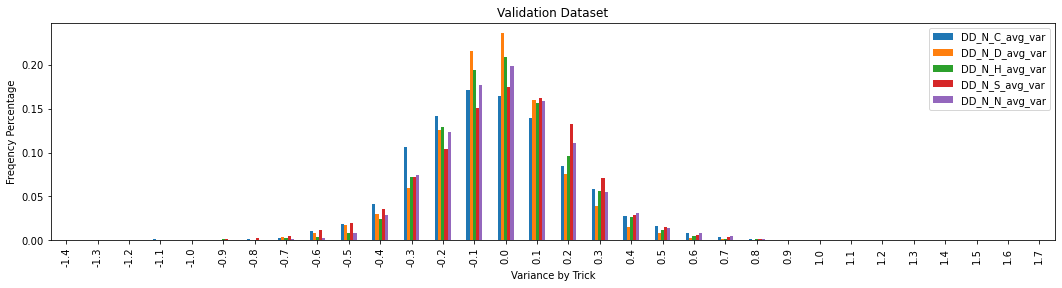

In [26]:
# plot variance .1 trick precision
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg_var'
    plotd[n] = df_preds[n][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

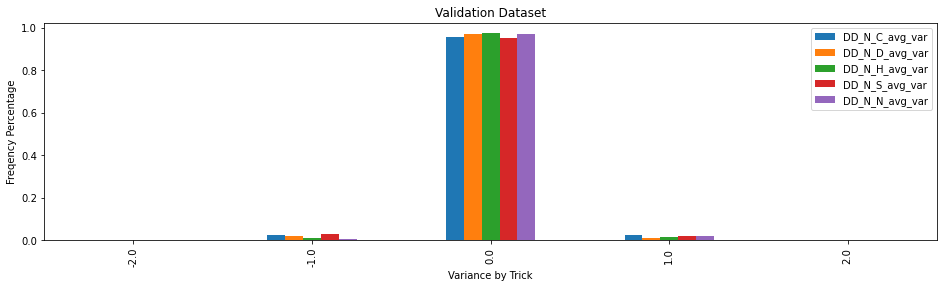

In [27]:
# plot variance 1 trick precision
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg_var'
    plotd[n] = df_preds[n].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

In [28]:
testdf = test[cont_names+cat_names].copy()
# need to transform columns for inference too
for n in testdf:
    if pd.api.types.is_categorical_dtype(testdf[n]):
        testdf[n] = testdf[n].cat.codes

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in testdf:
    if pd.api.types.is_bool_dtype(testdf[n]):
        testdf[n] = testdf[n].astype('uint8')

In [29]:
testdf.dtypes

Vul_NS          uint8
Vul_EW          uint8
SL_N_S           int8
SL_N_H           int8
SL_N_D           int8
SL_N_C           int8
HCP_S            int8
HCP_EW           int8
DD_N_C_avg    float64
DD_N_D_avg    float64
DD_N_H_avg    float64
DD_N_S_avg    float64
DD_N_N_avg    float64
SL_Max_NS        int8
SL_Max_EW        int8
dtype: object

In [30]:
# get predictions for test (as opposed to validation) dataset
dl_test = learn.dls.test_dl(testdf, with_labels=True)
preds, actuals = learn.get_preds(dl=dl_test)
len(preds), len(actuals), preds, actuals

(253116,
 253116,
 tensor([[10.7444, 11.2302,  7.6268, 11.4997,  8.7742],
         [ 3.4499,  7.8189,  5.2665, 10.7586,  5.9179],
         [ 8.3243,  1.6404,  9.1569,  1.0509,  5.2748],
         ...,
         [ 8.0975,  5.5378,  8.5290,  9.1043,  7.8638],
         [ 9.9801,  4.0741,  4.7660, 10.2920,  5.6318],
         [ 7.0254,  9.1985,  7.7888,  6.1964,  8.0520]]),
 tensor([[11.0000, 11.0000,  8.0000, 11.0000,  9.0000],
         [ 4.0000,  8.0000,  5.5000, 11.0000,  6.0000],
         [ 8.0000,  1.5000,  9.0000,  1.5000,  5.0000],
         ...,
         [ 8.0000,  5.5000,  8.5000,  9.0000,  8.0000],
         [10.5000,  4.5000,  5.5000, 10.5000,  6.0000],
         [ 7.0000,  9.0000,  8.0000,  6.0000,  8.0000]]))

In [31]:
pd.concat([pd.DataFrame(actuals),pd.DataFrame(preds)],axis='columns')

,0,1,2,3,4,0,1,2,3,4
0,11.00,11.00,8.00,11.00,9.00,10.74,11.23,7.63,11.50,8.77
1,4.00,8.00,5.50,11.00,6.00,3.45,7.82,5.27,10.76,5.92
2,8.00,1.50,9.00,1.50,5.00,8.32,1.64,9.16,1.05,5.27
3,8.50,6.00,8.50,7.50,7.50,8.79,6.11,8.60,7.57,7.56
4,7.50,9.00,7.50,7.00,8.00,7.48,9.10,7.30,7.11,8.07
5,8.00,6.00,11.00,10.50,8.00,8.28,6.09,11.13,10.63,8.02
6,6.00,6.00,7.50,6.00,6.50,6.14,5.95,7.54,5.82,6.32
7,7.50,9.00,8.50,7.50,7.50,7.48,9.23,8.46,7.76,7.43
8,11.00,7.00,9.00,5.00,9.00,11.15,7.27,8.94,5.20,9.07
9,5.00,3.00,9.00,7.50,7.00,5.05,3.12,9.17,7.32,6.85


In [32]:
# create dataframe with test predictions
df_preds = AppendPredictionsToDF(testdf, preds)
df_preds.sort_index(axis='columns', inplace=True)
df_preds

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_EW,HCP_S,SL_Max_EW,SL_Max_EW_avg_actual,SL_Max_EW_avg_pred,SL_Max_EW_avg_var,SL_Max_NS,SL_Max_NS_avg_actual,SL_Max_NS_avg_pred,SL_Max_NS_avg_var,SL_N_C,SL_N_D,SL_N_H,SL_N_S,Vul_EW,Vul_NS
5228,11.00,10.74,0.26,11.00,11.23,-0.23,8.00,7.63,0.37,9.00,8.77,0.23,11.00,11.50,-0.50,10,12,2,8.00,7.63,0.37,3,11.00,11.50,-0.50,4,4,2,3,1,0
5229,4.00,3.45,0.55,8.00,7.82,0.18,5.50,5.27,0.23,6.00,5.92,0.08,11.00,10.76,0.24,16,9,0,4.00,3.45,0.55,3,11.00,10.76,0.24,3,4,3,3,0,0
5230,8.00,8.32,-0.32,1.50,1.64,-0.14,9.00,9.16,-0.16,5.00,5.27,-0.27,1.50,1.05,0.45,20,8,3,1.50,1.05,0.45,2,9.00,9.16,-0.16,5,2,5,1,0,0
5231,8.50,8.79,-0.29,6.00,6.11,-0.11,8.50,8.60,-0.10,7.50,7.56,-0.06,7.50,7.57,-0.07,17,14,1,6.00,6.11,-0.11,2,8.50,8.60,-0.10,3,4,4,2,1,0
5232,7.50,7.48,0.02,9.00,9.10,-0.10,7.50,7.30,0.20,8.00,8.07,-0.07,7.00,7.11,-0.11,17,4,3,7.00,7.11,-0.11,1,9.00,9.10,-0.10,2,5,5,1,1,1
5233,8.00,8.28,-0.28,6.00,6.09,-0.09,11.00,11.13,-0.13,8.00,8.02,-0.02,10.50,10.63,-0.13,13,13,1,6.00,6.09,-0.09,3,10.50,10.63,-0.13,4,3,4,2,1,1
5234,6.00,6.14,-0.14,6.00,5.95,0.05,7.50,7.54,-0.04,6.50,6.32,0.18,6.00,5.82,0.18,19,14,3,6.00,5.82,0.18,2,7.50,7.54,-0.04,4,3,4,2,0,0
5235,7.50,7.48,0.02,9.00,9.23,-0.23,8.50,8.46,0.04,7.50,7.43,0.07,7.50,7.76,-0.26,18,8,0,7.50,7.48,0.02,1,9.00,9.23,-0.23,4,3,4,2,1,1
5236,11.00,11.15,-0.15,7.00,7.27,-0.27,9.00,8.94,0.06,9.00,9.07,-0.07,5.00,5.20,-0.20,17,15,3,5.00,5.20,-0.20,0,11.00,11.15,-0.15,5,2,5,1,0,0
5237,5.00,5.05,-0.05,3.00,3.12,-0.12,9.00,9.17,-0.17,7.00,6.85,0.15,7.50,7.32,0.18,24,12,1,3.00,3.12,-0.12,2,9.00,9.17,-0.17,4,1,6,2,0,1


<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

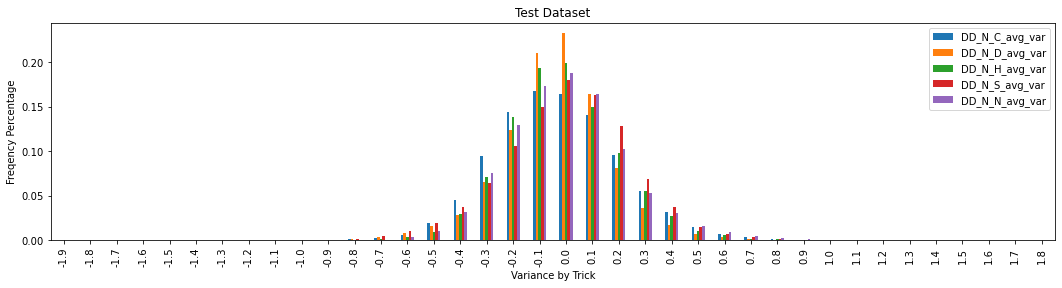

In [33]:
# plot with .1 trick precision
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg_var'
    plotd[n] = df_preds[n][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

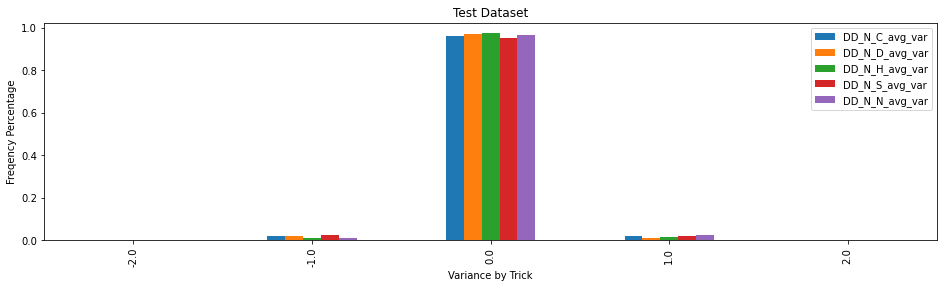

In [34]:
# plot with 1 trick precision
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg_var'
    plotd[n] = df_preds[n].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

In [35]:
# get validation dataset predictions. Pass passing learn.dls.valid) instead of default ().
preds, actuals = learn.get_preds(dl=learn.dls.valid)
len(preds), len(actuals), preds, actuals

(45924,
 45924,
 tensor([[ 8.3971, 11.1857,  7.3677,  7.7289, 10.4267],
         [ 8.0704,  7.4566,  6.2461,  5.6412,  6.6904],
         [ 5.2653,  4.3279,  7.5768,  7.6666,  5.3280],
         ...,
         [ 3.1027,  6.7595,  6.0854,  7.7295,  3.5843],
         [ 8.4826,  8.7298,  7.4288,  7.9908,  8.9708],
         [ 6.1167,  2.7621,  3.9298,  5.6604,  3.3707]]),
 tensor([[ 8.5000, 11.0000,  7.5000,  7.5000, 10.5000],
         [ 8.0000,  7.5000,  6.5000,  5.5000,  6.5000],
         [ 5.5000,  4.5000,  7.5000,  8.0000,  5.5000],
         ...,
         [ 3.5000,  7.0000,  6.0000,  8.0000,  4.0000],
         [ 8.5000,  8.5000,  7.5000,  8.0000,  9.0000],
         [ 6.0000,  3.0000,  4.0000,  6.0000,  3.0000]]))

In [36]:
# create dataframe from validation dataset
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
df_preds

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_EW,HCP_S,SL_Max_EW,SL_Max_EW_avg_actual,SL_Max_EW_avg_pred,SL_Max_EW_avg_var,SL_Max_NS,SL_Max_NS_avg_actual,SL_Max_NS_avg_pred,SL_Max_NS_avg_var,SL_N_C,SL_N_D,SL_N_H,SL_N_S,Vul_EW,Vul_NS
5012,8.50,8.40,0.10,11.00,11.19,-0.19,7.50,7.37,0.13,10.50,10.43,0.07,7.50,7.73,-0.23,15,14,3,7.50,7.73,-0.23,1,11.00,11.19,-0.19,4,6,2,1,1,1
5013,8.00,8.07,-0.07,7.50,7.46,0.04,6.50,6.25,0.25,6.50,6.69,-0.19,5.50,5.64,-0.14,21,10,3,5.50,5.64,-0.14,0,8.00,8.07,-0.07,7,2,4,0,1,1
5014,5.50,5.27,0.23,4.50,4.33,0.17,7.50,7.58,-0.08,5.50,5.33,0.17,8.00,7.67,0.33,21,10,1,4.50,4.33,0.17,2,7.50,7.58,-0.08,4,3,4,2,1,1
5015,4.50,4.76,-0.26,5.50,5.66,-0.16,8.50,8.64,-0.14,8.00,8.07,-0.07,7.50,7.59,-0.09,20,10,0,4.50,4.76,-0.26,2,8.50,8.64,-0.14,1,4,3,5,1,1
5016,2.50,2.62,-0.12,8.50,8.58,-0.08,6.50,6.61,-0.11,5.00,4.57,0.43,4.50,4.69,-0.19,21,11,0,2.50,2.62,-0.12,1,8.50,8.58,-0.08,3,5,2,3,1,1
5017,5.00,5.11,-0.11,6.00,6.05,-0.05,9.00,9.12,-0.12,6.50,6.37,0.13,6.00,5.84,0.16,19,7,0,5.00,5.11,-0.11,2,9.00,9.12,-0.12,1,3,7,2,1,1
5018,6.00,6.17,-0.17,8.00,8.09,-0.09,5.50,5.48,0.02,7.00,7.06,-0.06,5.50,5.68,-0.18,21,11,3,5.50,5.68,-0.18,1,8.00,8.09,-0.09,5,4,2,2,1,1
5019,9.00,9.09,-0.09,10.00,10.25,-0.25,9.00,9.01,-0.01,10.00,10.04,-0.04,8.50,8.77,-0.27,14,7,3,8.50,8.77,-0.27,1,10.00,10.25,-0.25,3,3,2,5,1,1
5020,3.00,2.90,0.10,1.00,0.90,0.10,4.00,3.67,0.33,1.00,1.76,-0.76,7.00,6.69,0.31,24,6,1,1.00,0.90,0.10,3,7.00,6.69,0.31,3,2,3,5,1,1
5021,7.50,7.39,0.11,6.00,5.98,0.02,5.00,4.92,0.08,7.00,6.99,0.01,8.50,8.49,0.01,19,16,2,5.00,4.92,0.08,3,8.50,8.49,0.01,2,3,3,5,1,0


<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

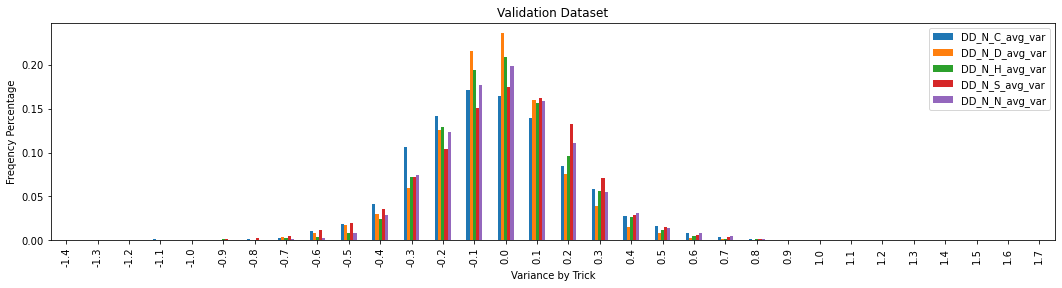

In [37]:
# plot dd variance using .1 trick precision
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg_var'
    plotd[n] = df_preds[n][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

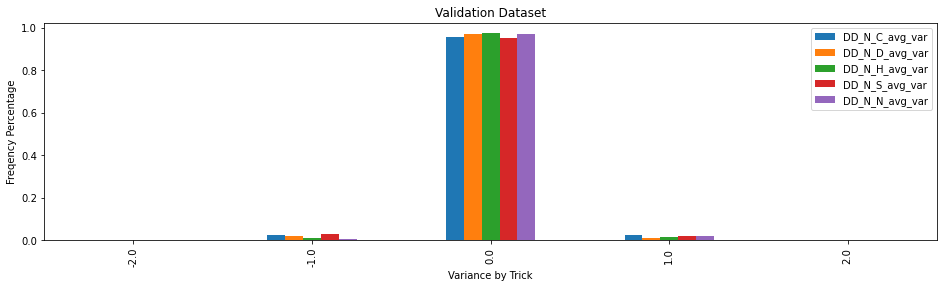

In [38]:
# plot dd variance using 1 trick precision
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg_var'
    plotd[n] = df_preds[n].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

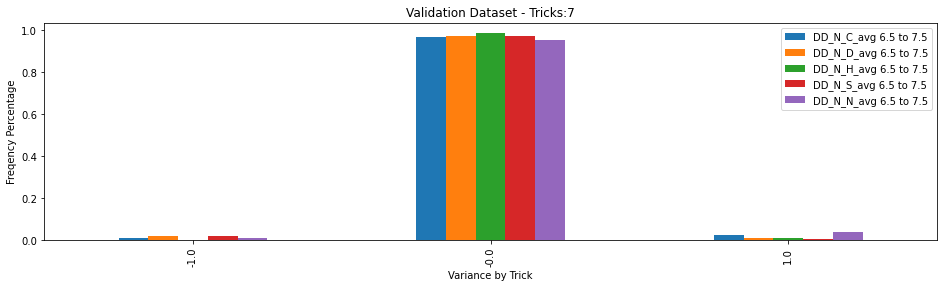

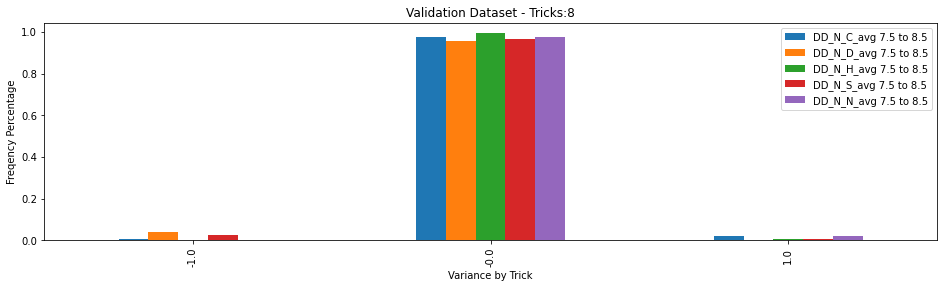

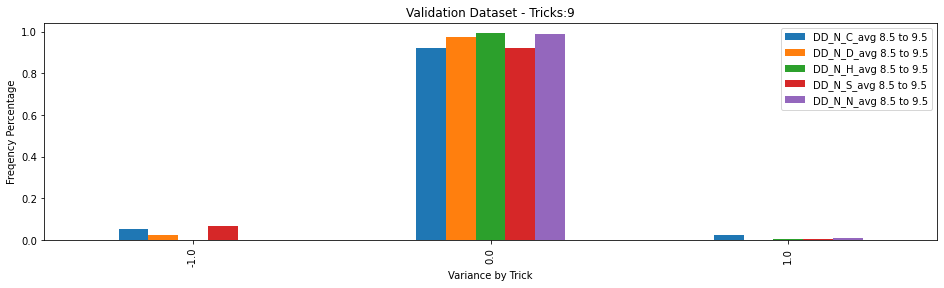

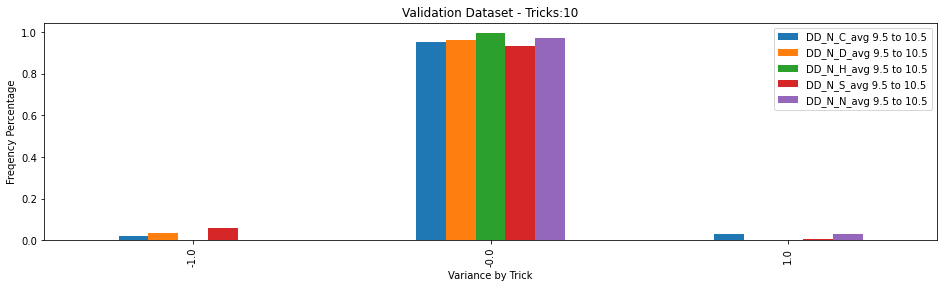

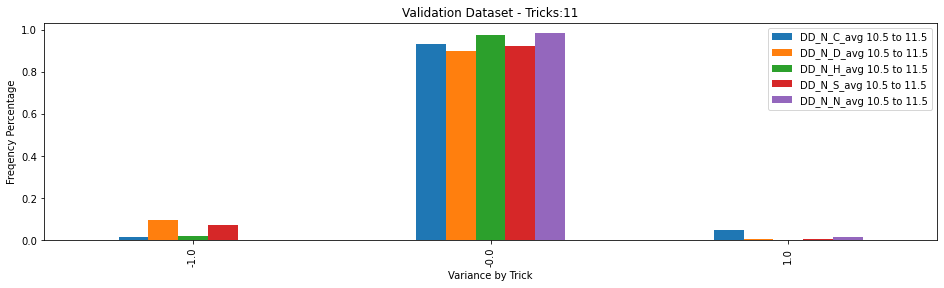

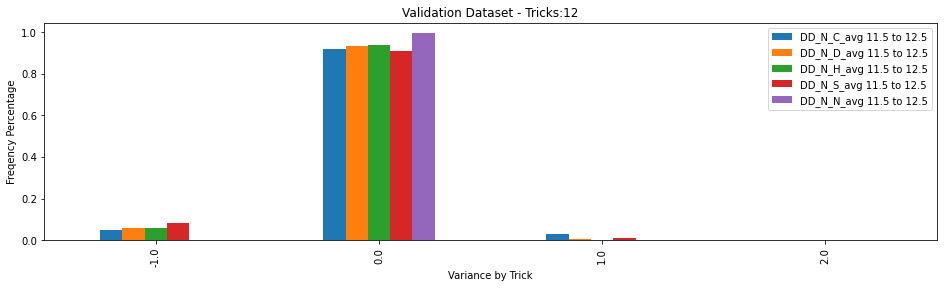

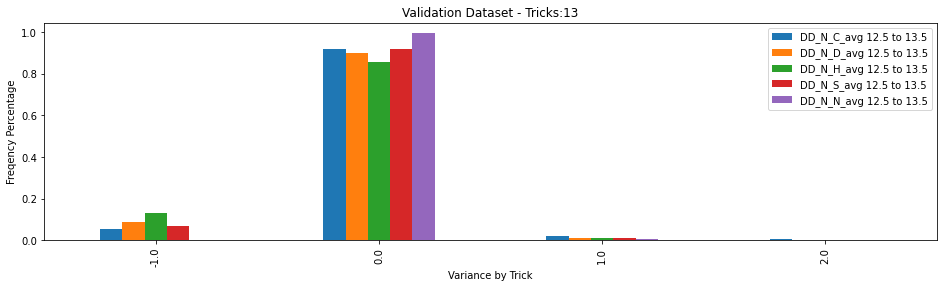

In [39]:
# plot dd variance, by trick count, using 1 trick precision
for t in range(6,13):
    plotd = {}
    for d in mlBridgeLib.CDHSN:
        n = 'DD_N_'+d+'_avg'
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

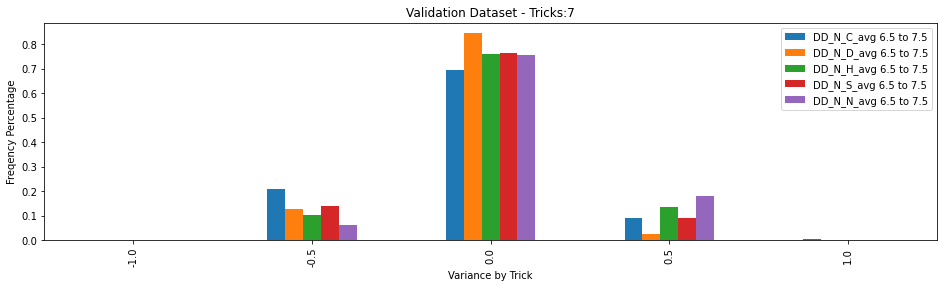

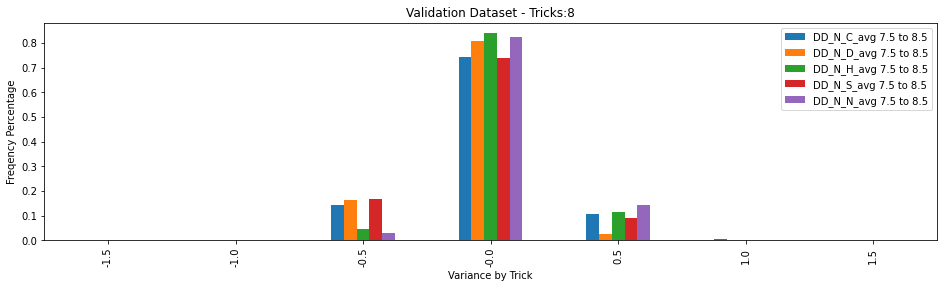

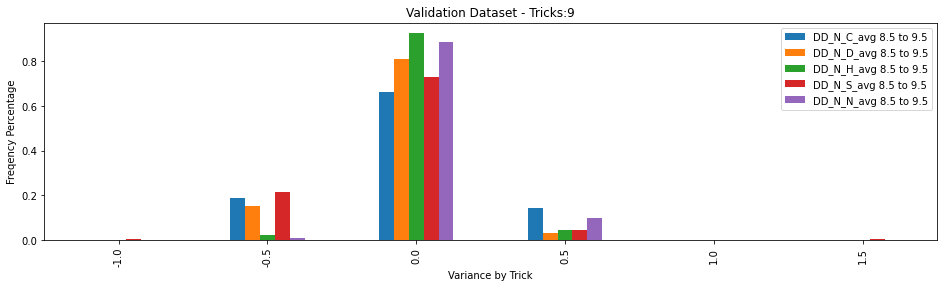

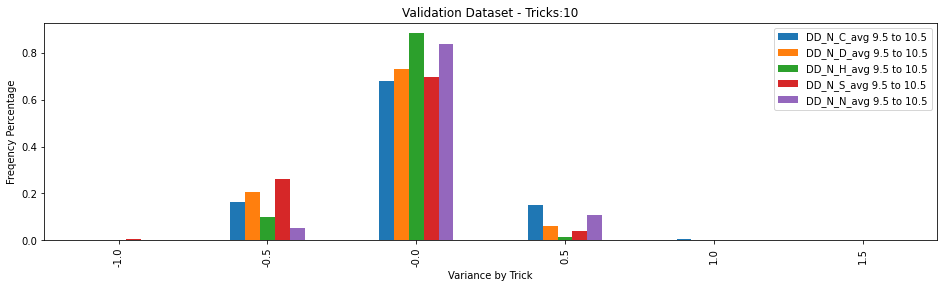

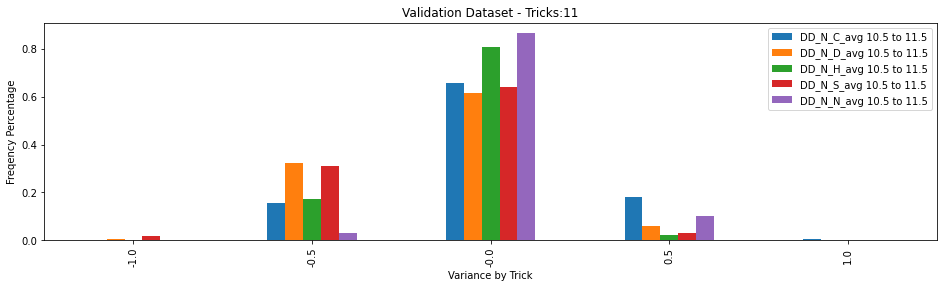

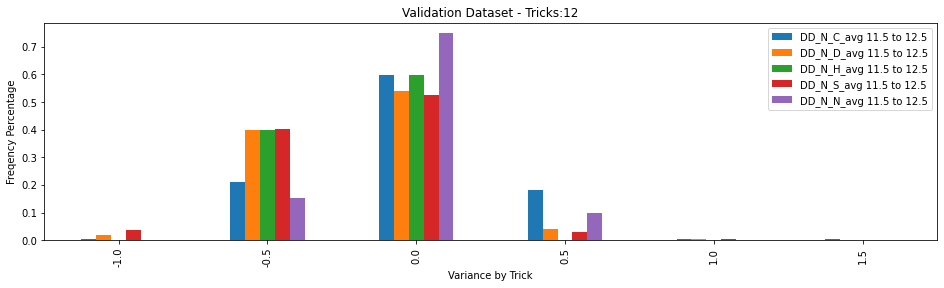

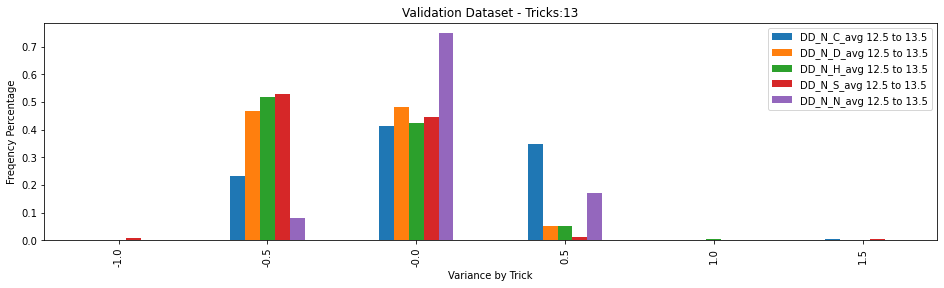

In [40]:
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for d in mlBridgeLib.CDHSN:
        n = 'DD_N_'+d+'_avg'
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))